Read the data from 8 diffrent folders (2018-2024) with 12 documents (Jan-Dec) in each containing information about the Dricks gained each day. 

In [56]:
import os
import pandas as pd

# Path to the base folder that contains the year folders
base_folder_path = r"C:\Users\benja\OneDrive\Skrivbord\python\Personal-20241211T104412Z-001\Personal"

# List to collect all DataFrames for the large combined DataFrame
df_list = []

# Loop through all year folders (7 folders)
for year_folder in os.listdir(base_folder_path):
    year_folder_path = os.path.join(base_folder_path, year_folder)

    # Make sure it's a directory (ignore files, we need only folders)
    if os.path.isdir(year_folder_path):
        # Loop through all files in the year folder (the 12 months)
        for file_name in os.listdir(year_folder_path):
            # Check if the file is an Excel file
            if file_name.endswith(".xlsx"):
                # Extract the month-year name (e.g., "JANUARI2024")
                month_year_name = file_name.split('.')[0].upper()  # Remove file extension and convert to uppercase

                # Full path to the current file
                file_path = os.path.join(year_folder_path, file_name)

                try:
                    # Load the "Drille in" sheet into a DataFrame
                    df_drille_in = pd.read_excel(file_path, sheet_name="Drille in")

                    # Adjust the column renaming if necessary
                    df_drille_in = df_drille_in.rename(columns={
                        df_drille_in.columns[0]: "date",
                        df_drille_in.columns[1]: "weekday",
                        df_drille_in.columns[2]: "kontant",
                        df_drille_in.columns[3]: "kort",
                        df_drille_in.columns[4]: "total"
                    })

                    # Extract relevant columns
                    df_filtered = df_drille_in[["date", "weekday", "kontant", "kort", "total"]]

                    # Dynamically create the monthly DataFrame variable name
                    df_name = f"{month_year_name}_df"
                    globals()[df_name] = df_filtered

                    # Append this DataFrame to the list for the large combined DataFrame
                    df_list.append(df_filtered)

                    # Print confirmation
                    print(f"DataFrame for {file_name} saved as {df_name}.")

                except ValueError:
                    # If the sheet "Drille in" is not found, print a message and continue
                    print(f"Could not read {file_name} (no 'Drille in' sheet). Continuing to next file.")

# Concatenate all the DataFrames in the list into a single large DataFrame
dricks_df = pd.concat(df_list, ignore_index=True)

# Display the combined DataFrame
print("Combined DataFrame:")
print(dricks_df)



DataFrame for AUGUSTI2018.xlsx saved as AUGUSTI2018_df.
DataFrame for DECEMBER2018.xlsx saved as DECEMBER2018_df.
Could not read FEBRUARI2018.xlsx (no 'Drille in' sheet). Continuing to next file.
DataFrame for JULI2018.xlsx saved as JULI2018_df.
DataFrame for JUNI2018.xlsx saved as JUNI2018_df.
Could not read MAJ.xlsx (no 'Drille in' sheet). Continuing to next file.
DataFrame for NOVEMBER2018.xlsx saved as NOVEMBER2018_df.
DataFrame for OKTOBER2018.xlsx saved as OKTOBER2018_df.
DataFrame for SEPTEMBER2018.xlsx saved as SEPTEMBER2018_df.
DataFrame for APRIL2019.xlsx saved as APRIL2019_df.
DataFrame for AUGUSTI2019.xlsx saved as AUGUSTI2019_df.
DataFrame for DECEMBER2019.xlsx saved as DECEMBER2019_df.
DataFrame for FEBRUARI2019.xlsx saved as FEBRUARI2019_df.
DataFrame for JANUARI2019.xlsx saved as JANUARI2019_df.
DataFrame for JULI2019.xlsx saved as JULI2019_df.
DataFrame for JUNI2019.xlsx saved as JUNI2019_df.
DataFrame for MAJ2019.xlsx saved as MAJ2019_df.
DataFrame for MARS2019.xlsx s

Drop some NA and then check the 10 days with most tip gained.

In [57]:
dricks_df['total'] = pd.to_numeric(dricks_df['total'], errors='coerce')
dricks_df['kort'] = pd.to_numeric(dricks_df['kort'], errors='coerce')
dricks_df['kontant'] = pd.to_numeric(dricks_df['kontant'], errors='coerce')
dricks_df = dricks_df.dropna(subset=['date'])
dricks_df = dricks_df.dropna(subset=['total'])
dricks_df = dricks_df[dricks_df['total'] != 0]
top10 = dricks_df.nlargest(10, 'total')
top10

,date,weekday,kontant,kort,total
2430,2024-08-24,lördag,NaN,7421.85,7421.85
2765,2024-10-26,Lördag,NaN,7273.10,7273.10
2382,2024-04-13,lördag,NaN,7111.64,7111.64
2246,2023-03-25,lördag,NaN,6900.00,6900.00
2396,2024-04-27,lördag,NaN,6680.50,6680.50
2483,2024-02-03,lördag,NaN,6651.87,6651.87
2758,2024-10-19,Lördag,NaN,6572.80,6572.80
2790,2024-09-14,lördag,NaN,6544.45,6544.45
2416,2024-08-10,lördag,NaN,6480.50,6480.50
2653,2024-05-25,lördag,NaN,6469.50,6469.50


Plot the tip over time.

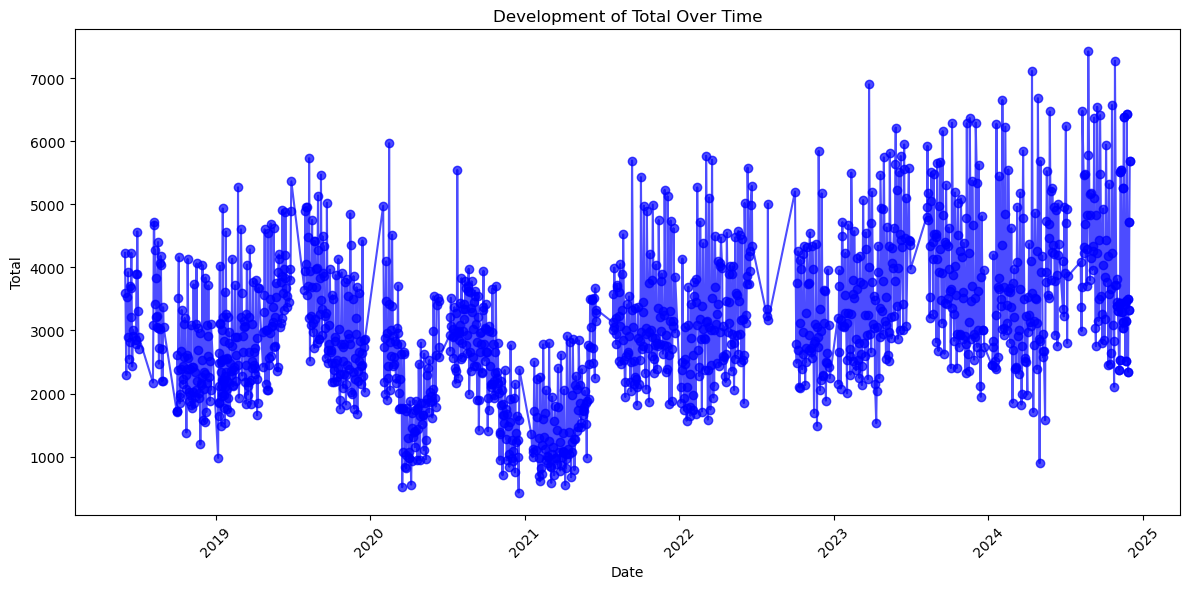

In [58]:
import matplotlib.pyplot as plt

# Ensure that 'date' is in datetime format (if not already)
dricks_df['date'] = pd.to_datetime(dricks_df['date'], errors='coerce')

# Drop rows with NaT in 'date' column
dricks_df = dricks_df.dropna(subset=['date'])

# Sort the dataframe by date (if it's not already sorted)
dricks_df = dricks_df.sort_values('date')

# Plotting date vs. total
plt.figure(figsize=(12, 6))  # Set the size of the plot
plt.plot(dricks_df['date'], dricks_df['total'], marker='o', color='blue', alpha=0.7)  # Line plot with markers
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Total')  # Label for y-axis
plt.title('Development of Total Over Time')  # Title of the plot

# Optional: Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


Plot only 2024.

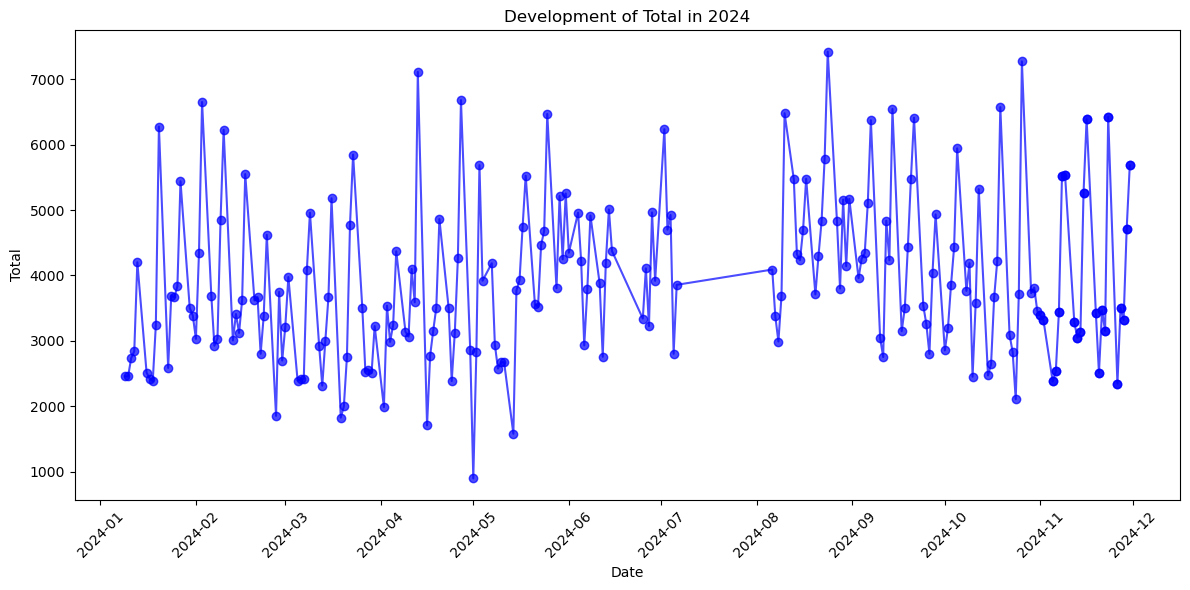

In [59]:
# Filter the dataframe for rows where the 'date' is in 2024
dricks_2024_df = dricks_df[dricks_df['date'].dt.year == 2024]

# Drop rows where 'total' is 0 or NaN
dricks_2024_df = dricks_2024_df[dricks_2024_df['total'] != 0]

# Sort the dataframe by date (in case it's not sorted)
dricks_2024_df = dricks_2024_df.sort_values('date')

# Plotting date vs. total for 2024
plt.figure(figsize=(12, 6))  # Set the size of the plot
plt.plot(dricks_2024_df['date'], dricks_2024_df['total'], marker='o', color='blue', alpha=0.7)  # Line plot with markers
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Total')  # Label for y-axis
plt.title('Development of Total in 2024')  # Title of the plot

# Optional: Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


Plot only the saturdays

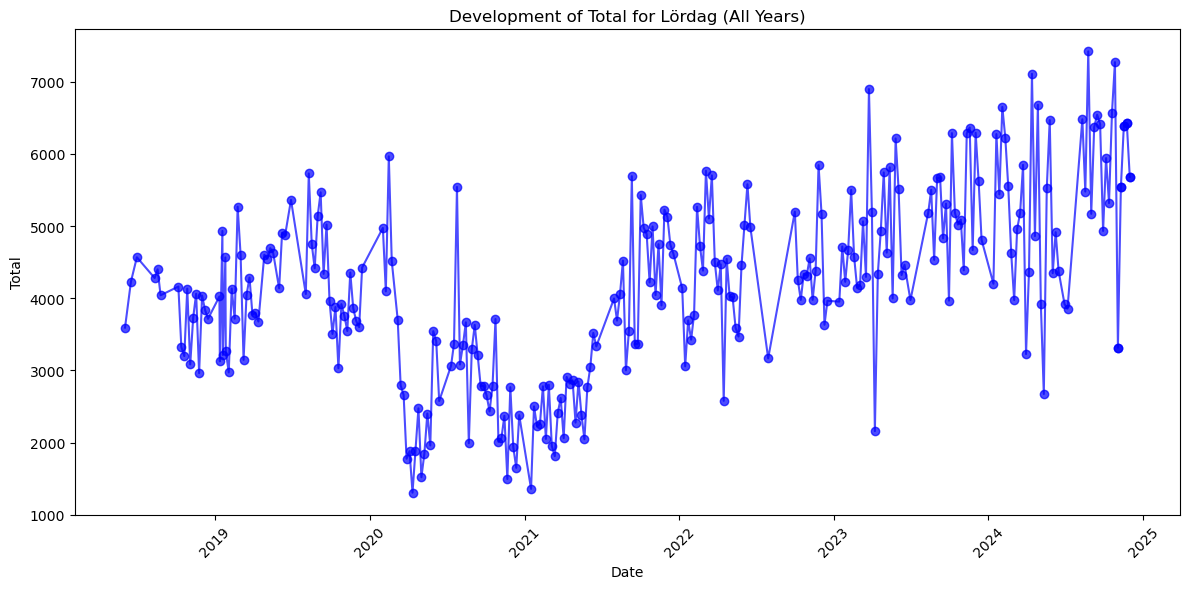

In [60]:
# Filter the dataframe for rows where the 'weekday' is "Lördag" (case insensitive)
dricks_lordag_df = dricks_df[dricks_df['weekday'].str.contains('lördag', case=False, na=False)]

# Drop rows where 'total' is 0 or NaN
dricks_lordag_df = dricks_lordag_df[dricks_lordag_df['total'] != 0]

# Sort the dataframe by date (in case it's not sorted)
dricks_lordag_df = dricks_lordag_df.sort_values('date')

# Plotting date vs. total for "Lördag"
plt.figure(figsize=(12, 6))  # Set the size of the plot
plt.plot(dricks_lordag_df['date'], dricks_lordag_df['total'], marker='o', color='blue', alpha=0.7)  # Line plot with markers
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Total')  # Label for y-axis
plt.title('Development of Total for Lördag (All Years)')  # Title of the plot

# Optional: Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

Examine the huge diffrence between two saturdays in 2023 so close to eachother.

In [61]:
# Filter the DataFrame for "Lördag" (case-insensitive) in 2023
lördag_2023_df = dricks_df[(dricks_df['weekday'].str.contains('lördag', case=False, na=False)) & 
                            (dricks_df['date'].dt.year == 2023)]

# Find the highest total for "Lördag" in 2023
highest_lordag = lördag_2023_df.loc[lördag_2023_df['total'].idxmax()]

# Find the lowest total for "Lördag" in 2023
lowest_lordag = lördag_2023_df.loc[lördag_2023_df['total'].idxmin()]

# Display the results
print("Highest total on Lördag in 2023:")
print(highest_lordag[['date', 'total']])

print("\nLowest total on Lördag in 2023:")
print(lowest_lordag[['date', 'total']])


Highest total on Lördag in 2023:
date     2023-03-25 00:00:00
total                 6900.0
Name: 2246, dtype: object

Lowest total on Lördag in 2023:
date     2023-04-08 00:00:00
total                 2157.6
Name: 1970, dtype: object


Turns out it was easter that resulted in the extreme low (2157 on April 8th).

Compare on what weekday most tip is gained.

In [62]:
# Ensure that 'date' is in datetime format (if not already)
dricks_df['date'] = pd.to_datetime(dricks_df['date'], errors='coerce')

# Group by 'weekday' and calculate the mean of 'total' for each group
weekday_avg = dricks_df.groupby(dricks_df['weekday'].str.lower())['total'].mean()

# Display the average total for each weekday
print(weekday_avg)


weekday
fredag     3339.689317
lördag     4189.531739
måndag     2382.100000
onsdag     2722.431000
tisdag     2617.872135
torsdag    2782.722727
Name: total, dtype: float64


Do it over the last two years if it might be more relevant.

In [63]:
# Filter the DataFrame for the years 2023 and 2024
last2years_df = dricks_df[dricks_df['date'].dt.year.isin([2023,2024])]

# Group by 'weekday' (case-insensitive) and calculate the mean of 'total' for each group
weekday_avg = last2years_df.groupby(last2years_df['weekday'].str.lower())['total'].mean()

# Display the average total for each weekday
print(weekday_avg)


weekday
fredag     4184.528901
lördag     5200.219556
onsdag     3198.087692
tisdag     3261.412857
torsdag    3391.963889
Name: total, dtype: float64


Check the average for each year, each month and day of the month (seperatly).

In [64]:
# 1. Average total per year
average_per_year = dricks_df.groupby(dricks_df['date'].dt.year)['total'].mean()

# 2. Average total per month (across all years)
# Extract month from 'date'
dricks_df['month'] = dricks_df['date'].dt.month
average_per_month = dricks_df.groupby('month')['total'].mean()

# 3. Average total per day of the month (1-31)
# Extract day of the month from 'date'
dricks_df['day'] = dricks_df['date'].dt.day
average_per_day = dricks_df.groupby('day')['total'].mean()

# Display results
print("Average total per year:")
print(average_per_year)

print("\nAverage total per month (all years):")
print(average_per_month)

print("\nAverage total per day of the month (1-31) (all months, all years):")
print(average_per_day)


Average total per year:
date
2018    2796.508475
2019    3036.441176
2020    2360.654008
2021    2407.590698
2022    3174.998378
2023    3793.378009
2024    3894.683836
Name: total, dtype: float64

Average total per month (all years):
month
1     2664.612596
2     2890.671760
3     2677.714143
4     2704.613889
5     3027.675113
6     3717.377130
7     3363.236585
8     3742.632148
9     3487.060000
10    3068.626071
11    3074.692088
12    2711.038367
Name: total, dtype: float64

Average total per day of the month (1-31) (all months, all years):
day
1     2959.853191
2     2896.560816
3     2970.713913
4     3039.567292
5     2978.465102
6     2956.118511
7     3039.746667
8     3138.273019
9     3094.392642
10    3072.527308
11    3146.437547
12    2960.359423
13    3112.324200
14    3030.406792
15    3205.897647
16    3150.547170
17    3004.570800
18    3131.071200
19    2938.924898
20    3006.565319
21    3141.446122
22    2934.420652
23    3258.569773
24    3100.601628
25    3137.